In [2]:
%cd C:\Users\yukir\Documents\GitHub\Sign_Recognition\py

from basic_preprocessing import *
from deeplearning_check import *
from machine_learning import *

gpu_check()
set_global_determinism(seed=SEED)

%cd C:\Users\yukir\Documents\Monicas_workspace\Knee

C:\Users\yukir\Documents\GitHub\Sign_Recognition\py
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11681719739288787768
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 18368085166108246632
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6359618642782194322
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 2428061413745708611
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
keras 2.3.0-tf
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\Knee


In [50]:
%matplotlib inline
import numpy as np 
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model

In [51]:
from tensorflow.keras.applications import Xception

In [17]:
### classess = 5로 줄여야 할 수도 있음
 
model = tf.keras.applications.xception.Xception(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

In [7]:
n_class = 5

# path to kaggle dataset
root_path = "C:\\Users\\yukir\\Documents\\Monicas_workspace\\NEW_Knee\\newenw\\last_pang\\train"

img_list = os.listdir(root_path)

label_list = []
image_list = []

for i in os.listdir(root_path):
    img_list = os.listdir(root_path+'\\'+i)
    label_list += [int(i)] * len(img_list)
    for k in img_list:
        # print(k)
        img_adr = root_path +'\\'+i+'\\'+k
        image_list.append(img_adr)
        

df_train_kaggle  = pd.DataFrame({'filepath':image_list, 'label':label_list})
df_train_kaggle.label.value_counts()

# # convert to dataframe
# df_train_kaggle = pd.DataFrame({"filepath" : image_path_list, "label": label_list})

0    5553
2    3712
1    2548
3    1852
4     424
Name: label, dtype: int64

In [8]:
df_train_kaggle.label.value_counts()

0    5553
2    3712
1    2548
3    1852
4     424
Name: label, dtype: int64

In [9]:
df_train_kaggle.shape

(14089, 2)

### class distribution

Text(0, 0.5, 'count')

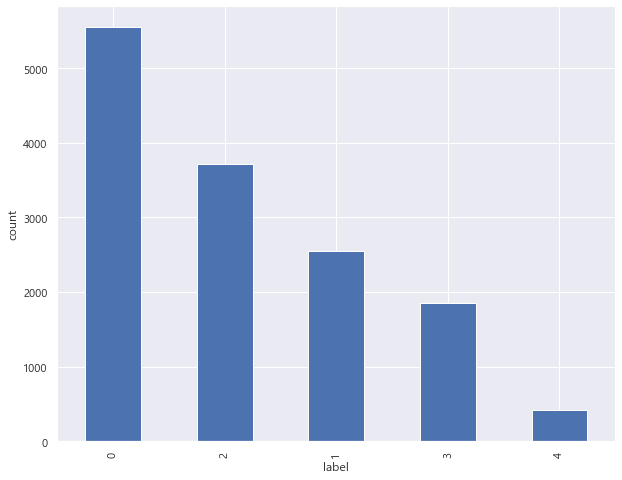

In [10]:
df_train_kaggle.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [11]:
# train data generator object
train_aug = ImageDataGenerator(rescale=1./255)

# validation data generator object
valid_aug = ImageDataGenerator(rescale=1./255)

In [12]:
# create train generator
train_generator = train_aug.flow_from_dataframe(
dataframe=df_train_kaggle,
directory=None,
x_col="filepath",
y_col="label",
batch_size=32,
seed=42,
shuffle=True,
class_mode="raw",
target_size=(224,224))

Found 14089 validated image filenames.


In [60]:
%cd C:\Users\yukir\Documents\Monicas_workspace\NEW_Knee

C:\Users\yukir\Documents\Monicas_workspace\NEW_Knee


In [13]:
n_class = 5

# path to kaggle dataset
root_path = "C:\\Users\\yukir\\Documents\\Monicas_workspace\\NEW_Knee\\newenw\\last_pang\\val"

img_list = os.listdir(root_path)

label_list = []
image_list = []

for i in os.listdir(root_path):
    img_list = os.listdir(root_path+'\\'+i)
    label_list += [int(i)] * len(img_list)
    for k in img_list:
        # print(k)
        img_adr = root_path +'\\'+i+'\\'+k
        image_list.append(img_adr)
        

df_val_kaggle  = pd.DataFrame({'filepath':image_list, 'label':label_list})
df_val_kaggle.label.value_counts()

# # convert to dataframe
# df_train_kaggle = pd.DataFrame({"filepath" : image_path_list, "label": label_list})

0    1389
2     928
1     638
3     463
4     107
Name: label, dtype: int64

Text(0, 0.5, 'count')

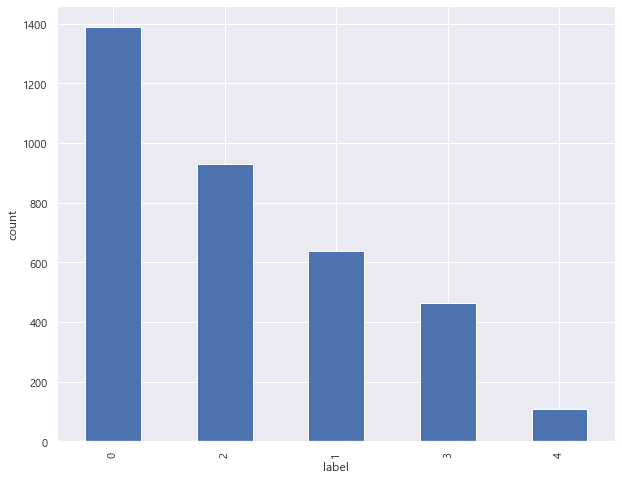

In [14]:
df_val_kaggle.label.value_counts().plot.bar()
plt.xlabel("label")
plt.ylabel("count")

In [15]:
# create validation generator
valid_generator = valid_aug.flow_from_dataframe( 
dataframe= df_val_kaggle,
x_col= "filepath",
y_col= "label",
batch_size= 32,
seed= 42,
shuffle= True,
class_mode= "raw",
target_size= (224,224))

Found 3525 validated image filenames.


In [20]:
%matplotlib inline
import numpy as np 
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model

In [35]:
# compile
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001,decay=0.0001),
                 metrics=["acc"],
                 loss= tf.keras.losses.sparse_categorical_crossentropy)

# callbacks and checkpoints
checkpoint_path = "xception_best.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
my_callbacks = [
               ModelCheckpoint(checkpoint_path,
                               monitor = 'val_acc',
                               verbose = 1,
                               save_weights_only=True,
                               save_best_only = True,
                               mode="max"),
              EarlyStopping(monitor='val_loss',
                            patience=25,
                            verbose=0)
                
]

In [22]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes= np.unique(df_train_kaggle.label.values),
                                                 y= df_train_kaggle.label.values)
class_weights = dict(enumerate(class_weights))

In [23]:
class_weights

{0: 0.5074374212137583,
 1: 1.1058869701726846,
 2: 0.7591056034482758,
 3: 1.521490280777538,
 4: 6.645754716981132}

In [36]:
# train the model
history = model.fit(
        train_generator,
        epochs=100,
        validation_data=valid_generator,
        callbacks=[my_callbacks],
        class_weight=class_weights)
print(history.history)
# load best saved weights
model.load_weights(checkpoint_path)

Epoch 1/100
441/441 [==============================] - ETA: 0s - loss: 0.0228 - acc: 0.9938
Epoch 00001: val_acc improved from -inf to 0.82213, saving model to xception_best.ckpt
441/441 [==============================] - 195s 443ms/step - loss: 0.0228 - acc: 0.9938 - val_loss: 0.7137 - val_acc: 0.8221
Epoch 2/100
441/441 [==============================] - ETA: 0s - loss: 0.0182 - acc: 0.9949
Epoch 00002: val_acc did not improve from 0.82213
441/441 [==============================] - 169s 383ms/step - loss: 0.0182 - acc: 0.9949 - val_loss: 0.7275 - val_acc: 0.8221
Epoch 3/100
441/441 [==============================] - ETA: 0s - loss: 0.0128 - acc: 0.9962
Epoch 00003: val_acc improved from 0.82213 to 0.82326, saving model to xception_best.ckpt
441/441 [==============================] - 170s 386ms/step - loss: 0.0128 - acc: 0.9962 - val_loss: 0.7298 - val_acc: 0.8233
Epoch 4/100
441/441 [==============================] - ETA: 0s - loss: 0.0122 - acc: 0.9968
Epoch 00004: val_acc improved 

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


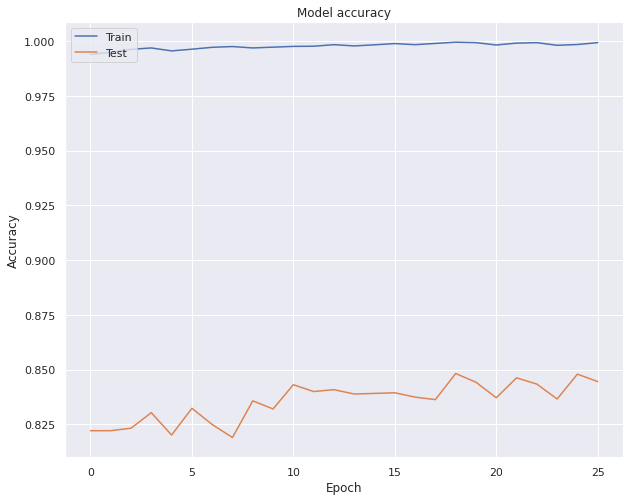

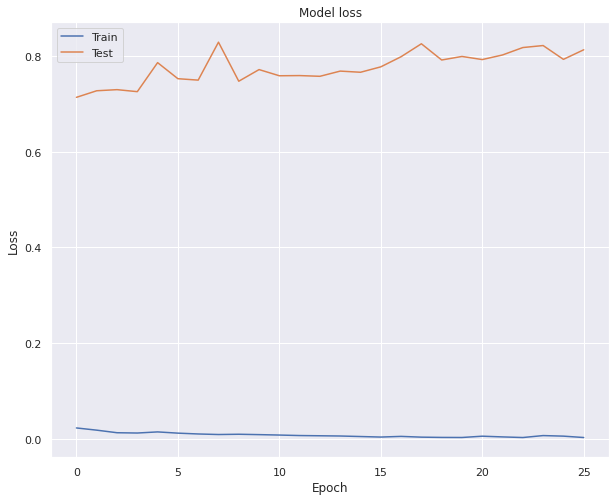

In [38]:
# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [39]:
preds = model.evaluate(valid_generator)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

111/111 [==============================] - 11s 99ms/step - loss: 0.7918 - acc: 0.8482 6s - loss: 0.8120 - acc: 0 - ETA: 5s - loss: 0.7934 - acc: 0. - ETA: 5s - loss - ETA: 3s - loss: 0.7 - ETA: 1s - loss: 0.7999 - acc: - ETA: 0s - loss: 0.7807 - acc:
Loss = 0.7917741537094116
Test Accuracy = 0.8482269644737244


In [40]:
import matplotlib.image as mpimg
from matplotlib import font_manager, rc
rc('font',family="AppleGothic")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐


In [41]:
model.save_weights("[0324]Early_last_pang_v2.h5")

In [46]:
# read Train.csv file which contains image names and labels and preprocess them
root_path= "C:\\Users\\yukir\\Documents\\Monicas_workspace\\NEW_Knee\\data\\KneeXray\\KneeXray\\"
df_test_compi = pd.read_csv(root_path + "Test.csv")

# add absolute path to the image names
df_test_compi["filename"] = df_test_compi.filename.apply(lambda x: root_path+"test/" + x)
df_test_compi.head()

,filename
0,C:\Users\yukir\Documents\Monicas_workspace\NEW...
1,C:\Users\yukir\Documents\Monicas_workspace\NEW...
2,C:\Users\yukir\Documents\Monicas_workspace\NEW...
3,C:\Users\yukir\Documents\Monicas_workspace\NEW...
4,C:\Users\yukir\Documents\Monicas_workspace\NEW...


In [56]:
n_class = 5

# path to kaggle dataset
root_path= "C:\\Users\\yukir\\Documents\\Monicas_workspace\\NEW_Knee\\newenw\\whole_new\\OSAIL Knee Osteoarthritis KL Scoring Dataset\\OSAIL_KL_Dataset\\Labeled"

img_list = os.listdir(root_path)

label_list = []
image_list = []

for i in os.listdir(root_path):
    img_list = os.listdir(root_path+'\\'+i)
    label_list += [int(i)] * len(img_list)
    for k in img_list:
        # print(k)
        img_adr = root_path +'\\'+i+'\\'+k
        image_list.append(img_adr)
        

df_test_kaggle  = pd.DataFrame({'filepath':image_list, 'label':label_list})
df_test_kaggle.label.value_counts()

# # convert to dataframe
# df_train_kaggle = pd.DataFrame({"filepath" : image_path_list, "label": label_list})

0    932
2    615
1    428
3    306
4     71
Name: label, dtype: int64

In [58]:
from sklearn.metrics import precision_recall_curve
target_shape = 224
BATCH_SIZE = 1

# test generator
compi_gen = valid_aug.flow_from_dataframe(dataframe= df_test_kaggle,
                            x_col= "filepath",
                            class_mode=None,
                            target_size= (target_shape, target_shape),
                            shuffle= False,
                            batch_size= BATCH_SIZE
                            )

Found 2352 validated image filenames.


In [59]:
# prediction on train data
predicition_compi = model.predict(compi_gen, steps= compi_gen.n/ BATCH_SIZE, verbose= 1)


2352/2352 [==============================] - 18s 8ms/step


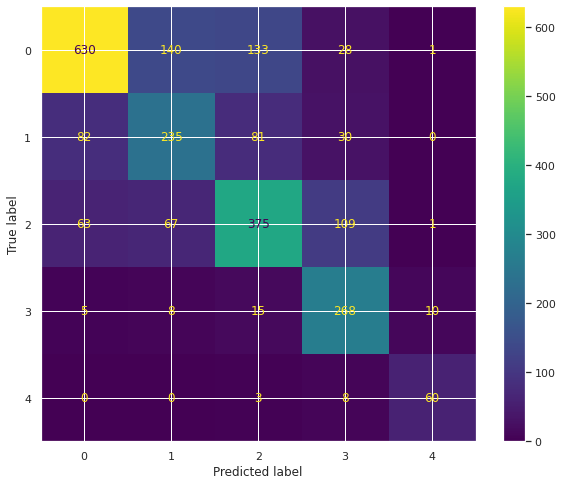

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class_prediction_compi =  np.argmax(predicition_compi, axis= 1)
cm = confusion_matrix(df_test_kaggle.label, class_prediction_compi, labels=[0, 1, 2, 3, 4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1, 2, 3, 4])
disp.plot()